<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


#### Read the dataset in the csv file from the URL


#### Add your code below following the instructions given in the course to complete the peer graded assignment


AxesSubplot(0.125,0.125;0.775x0.755)


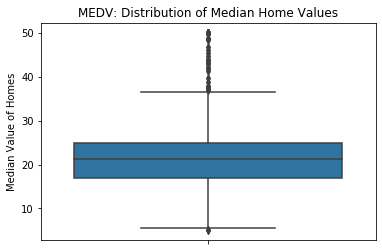

In [4]:
# For the "Median value of owner-occupied homes" provide a boxplot

boxplot_1=sns.boxplot(y="MEDV", data=boston_df)
boxplot_1.set_title("MEDV: Distribution of Median Home Values")
boxplot_1.set_ylabel("Median Value of Homes")
boxplot_1.set_xlabel("")
print(boxplot_1)

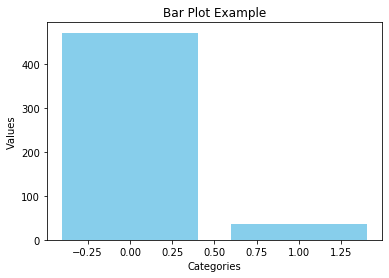

In [58]:
# Provide a bar plot for the Charles river variable

CHAS_Number = boston_df['CHAS'].value_counts()

barplot_1=pyplot.bar(CHAS_Number.index, CHAS_Number.values, color='skyblue')
pyplot.xlabel('CHASs')
pyplot.ylabel('Number of Entries per CHAS')
pyplot.title('Bar Plot Example')
pyplot.show()

age_group
between 35 and 70    24.947656
less than 35         27.775824
more than 70         19.793380
Name: MEDV, dtype: float64


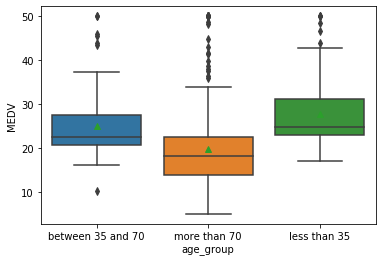

In [9]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 
# 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'less than 35'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = 'more than 70'

means_agegroup = boston_df.groupby('age_group')['MEDV'].mean()
print(means_agegroup)

ax = sns.boxplot(x="age_group", y="MEDV",data=boston_df, showmeans=True)


In [ ]:
# The means vary from 19.79 to 27.77. If thats statristically significant, further test would have to show

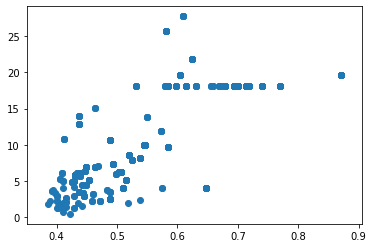

In [40]:
# Provide a scatter plot to show the relationship 
# between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship

import matplotlib.pyplot as plt

plt.scatter(boston_df["NOX"], boston_df["INDUS"])

plt.show()

In [ ]:
=> there is a correlation between NOX and INDUS: increasing NOX correlate to increasing INDUS, and vice versa

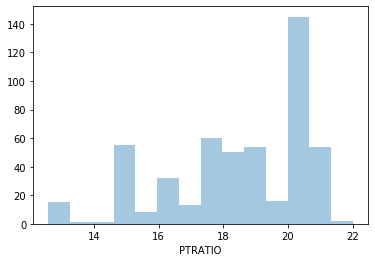

In [42]:
# Create a histogram for the pupil to teacher ratio variable

ax = sns.distplot(boston_df['PTRATIO'], kde = False)
plt.show()

In [ ]:
#most population of ptratio seems to be between 18 and 22

In [44]:
# Task 3 1. Is there a significant difference in median value of houses bounded by the Charles river or not? 
# (T-test for independent samples)
river_clos=boston_df[boston_df['CHAS']==1]['MEDV']
river_far=boston_df[boston_df['CHAS']==0]['MEDV']
scipy.stats.ttest_ind(river_clos,river_far)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [52]:
# Task 3 2. Is there a difference in Median values of houses (MEDV) 
# for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

from scipy.stats import f_oneway

MEDV_low=boston_df[boston_df['AGE']<33]['MEDV']
MEDV_mid=boston_df.loc[(boston_df['AGE'] >=33)&(boston_df['AGE'] <= 66)]['MEDV']
MEDV_high=boston_df[boston_df['AGE']>66]['MEDV']

result=scipy.stats.f_oneway(MEDV_low,MEDV_mid,MEDV_high)
print(result)

F_onewayResult(statistic=32.478690374799235, pvalue=5.4192314438834165e-14)


In [ ]:
=> F_onewayResult(statistic=32.478690374799235, pvalue=5.4192314438834165e-14)
=> p is less then 0.05 => Null-hypthesis can be rejected, there is a significant difference between MEDV and AGE

In [53]:
# Task 3 3. Can we conclude that there is no relationship between Nitric oxide concentrations and 
#          proportion of non-retail business acres per town? (Pearson Correlation)

x=scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(x)

(0.7636514469209159, 7.913361061232396e-98)


In [ ]:
=> Very low p-value indicates there is a linear relationship 
=> The answer is, NO, we cannot conclude there is no relationship.

In [54]:
# Task 3 4.What is the impact of an additional weighted distance to the five Boston employment centres 
#          on the median value of owner occupied homes? (Regression analysis)

import statsmodels.api as sm
model=sm.OLS(boston_df['MEDV'],boston_df['DIS']).fit()
prediction=model.predict()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):                   1.52e-146
Time:                        12:23:30   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
DIS(Coef)=4.7985 => MEDV increases with each DIS
p-Value of 0 is less than 0.05 => there is a relationship between MEDV and DIS
R-squared (uncentered) of 0.732 ?> There is a strong relationship between MEDV and DIS